# Face and eye detection
using Haar Cascade Classifiers

- face detection
- eye detection
- live detection

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [74]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/flickr30k_images/flickr30k_images/8116539330.jpg" #get_random_img_path(skip=["weather", "gem"])
IMG_PATH   

'../../res/img/flickr30k_images/flickr30k_images/8116539330.jpg'

---
### Loading data

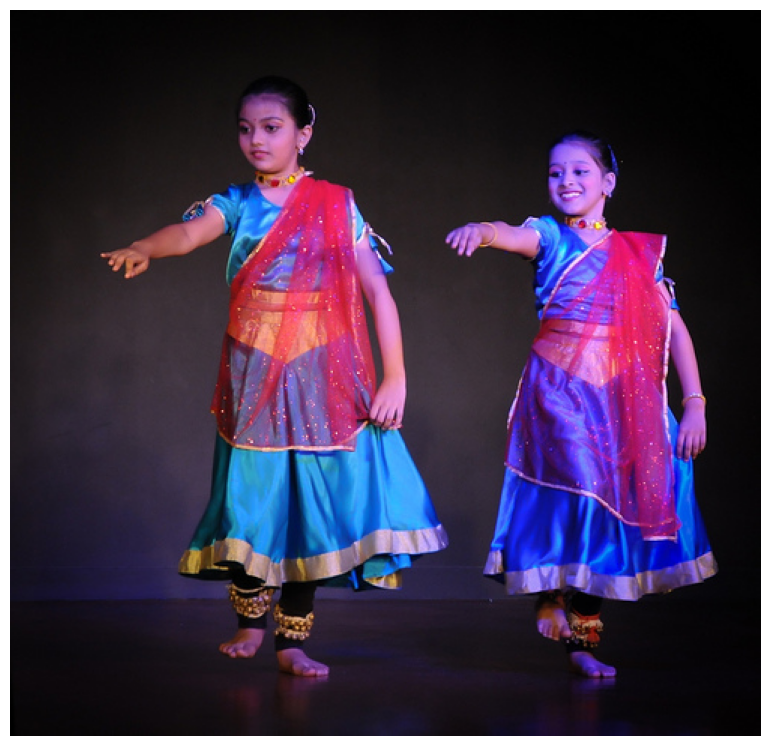

In [75]:
img = cv2.imread(IMG_PATH)
imshow(img)

You can download the different Haarcascade classifiers on [OpenCV's Github](https://github.com/opencv/opencv/tree/master/data/haarcascades).

Haarcascade Classifier uses Convolutions to extract Features from the image. There are convolutions for edges/lines...

> Hint: Haarcascade is an Objectdetector not a classifier, but the name is like that.

---
### Face detection

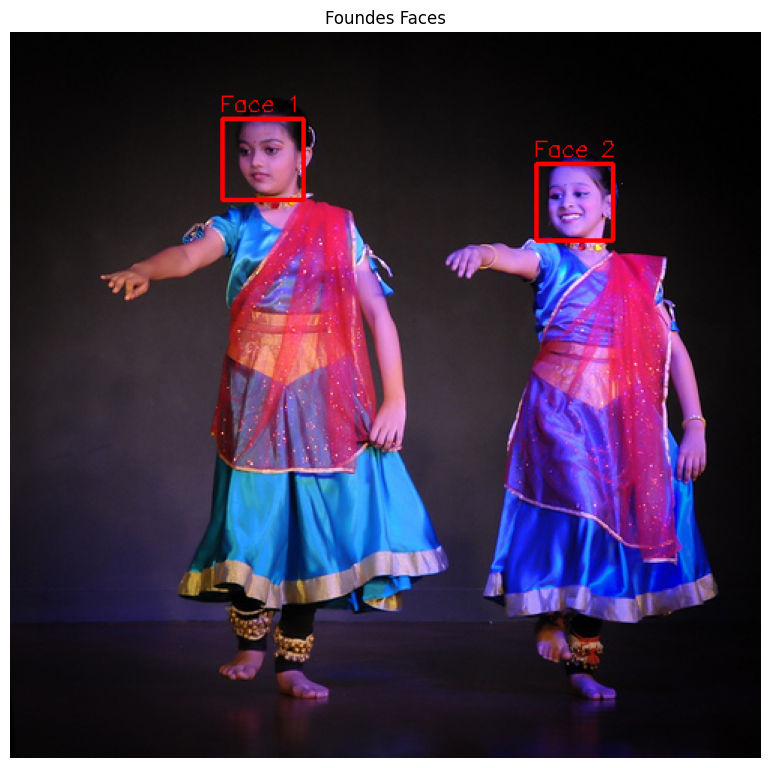

In [76]:
face_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_frontalface_default.xml")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

if len(faces) <= 0:
    print("No faces detected.")

faces_img = img.copy()
i = 1
for x, y, w, h in faces:
    cv2.rectangle(faces_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(faces_img, f"Face {i}", (x-2, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    i += 1

imshow(faces_img, "Foundes Faces")

---
### Eye and face detection

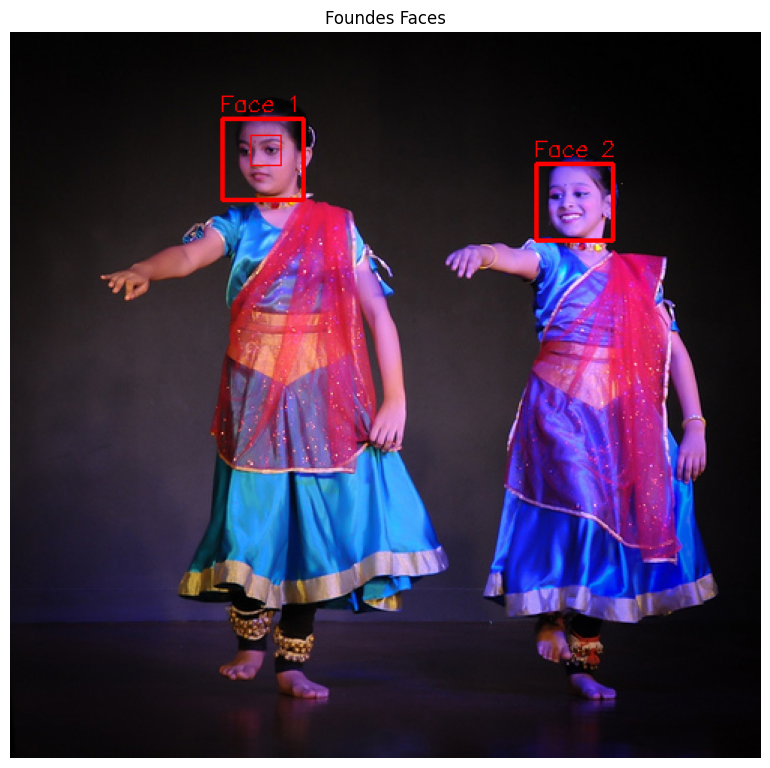

In [85]:
face_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_eye.xml")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

if len(faces) <= 0:
    print("No faces detected.")

faces_img = img.copy()
i = 1
for x, y, w, h in faces:
    cv2.rectangle(faces_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(faces_img, f"Face {i}", (x-2, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    gray_face = gray[y:y+h, x:x+w]
    color_face = faces_img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(gray_face, scaleFactor=1.3, minNeighbors=1)
    for eye_x, eye_y, eye_width, eye_height in eyes:
        cv2.rectangle(color_face, (eye_x, eye_y), (eye_x+eye_width, eye_y+eye_height), (0, 0, 255), 1)

    i += 1

imshow(faces_img, "Foundes Faces")

---
### Live Time Detection

In [ ]:
# For google colab:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo_on_google_colab(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [93]:
import os

def take_webcam_picture(output_dir='.', filename='webcam_picture.jpg'):
    # Initialize the webcam
    print("Wait...accessing the camering... (this could take some time)")
    cap = cv2.VideoCapture(0)

    # Check if the webcam is opened successfully
    if not cap.isOpened():
        print("Error: Could not access the webcam.")
        return None

    # Read a frame from the webcam
    ret, frame = cap.read()

    # Release the webcam
    cap.release()

    if not ret:
        print("Error: Failed to capture image from the webcam.")
        return None

    # Construct the file path
    file_path = os.path.join(output_dir, filename)

    # Save the image
    cv2.imwrite(file_path, frame)

    print(f"Image saved successfully at {file_path}")

    return file_path

Wait...accessing the camering... (this could take some time)
Image saved successfully at ../../res/img/webcam_picture.jpg


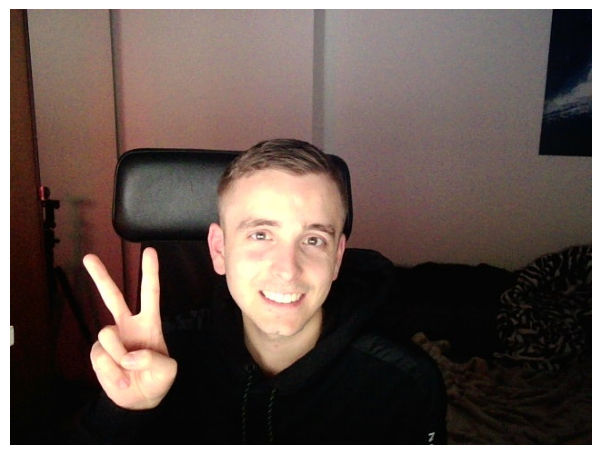

In [94]:
try:
    file_path = take_webcam_picture("../../res/img/")
    imshow(cv2.imread(file_path))
except Exception as err:
    print(err)

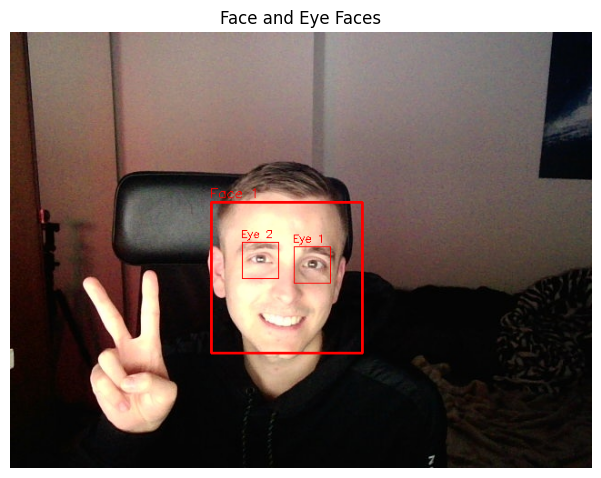

In [116]:
img = cv2.imread(file_path)

face_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_eye.xml")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

if len(faces) <= 0:
    print("No faces detected.")

faces_img = img.copy()
i = 1
for x, y, w, h in faces:
    cv2.rectangle(faces_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(faces_img, f"Face {i}", (x-2, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    gray_face = gray[y:y+h, x:x+w]
    color_face = faces_img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(gray_face, scaleFactor=2.0, minNeighbors=2)
    j = 1
    for eye_x, eye_y, eye_width, eye_height in eyes:
        cv2.rectangle(color_face, (eye_x, eye_y), (eye_x+eye_width, eye_y+eye_height), (0, 0, 255), 1)
        cv2.putText(color_face, f"Eye {j}", (eye_x-2, eye_y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
        j += 1

    i += 1

imshow(faces_img, "Face and Eye Detection")

---
### Video Capturing

In [124]:
face_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("../../res/haarcascade_classifier/haarcascade_eye.xml")

def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) <= 0:
        return img
    
    for x, y, w, h in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color, 1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow("Output", face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

---